In [1]:
import pandas as pd
import numpy as np

### 1. Load the dataset into python environment

In [2]:
df= pd.read_csv(r"C:\Users\sree0\OneDrive\Documents\DSA\titanic_dataset.csv")

### 2. Make ‘PassengerId’ as the index column

In [3]:
df.set_index('PassengerId', inplace=True)

###  3. Check the basic details of the dataset

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 4. Fill in all the missing values present in all the columns in the dataset

In [8]:
df.isnull().sum()



Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [10]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [11]:
# Creating a new column'HasCabin' that contains 1 if the passenger has a known cabin and 0 if the cabin information is missing.

In [12]:
df['HasCabin'] = df['Cabin'].notna().astype(int)


In [13]:
df.drop(["Cabin"], axis=1, inplace=True)

In [14]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


### 5. Check and handle outliers in at least 3 columns in the dataset

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt



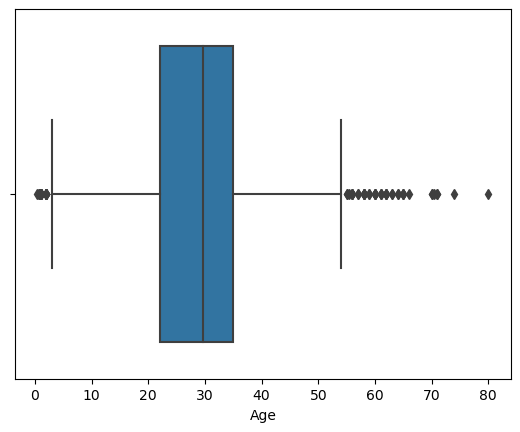

In [16]:
# Check outliers in 'Age' column
sns.boxplot(x=df['Age'])
plt.show()

# Handle outliers in 'Age' column by clipping values
df['Age'] = df['Age'].clip(0, df['Age'].quantile(0.99))



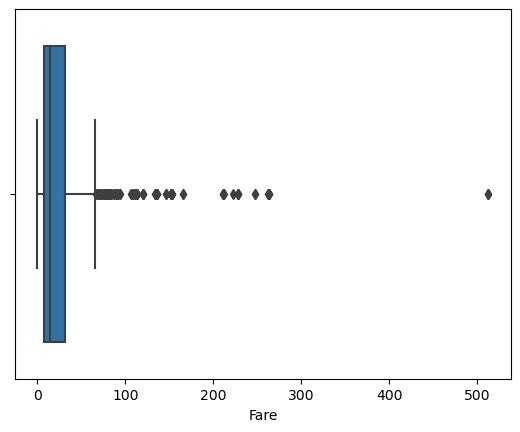

In [17]:
# Check outliers in 'Fare' column
sns.boxplot(x=df['Fare'])
plt.show()

# Handle outliers in 'Fare' column by clipping values
df['Fare'] = df['Fare'].clip(0, df['Fare'].quantile(0.99))



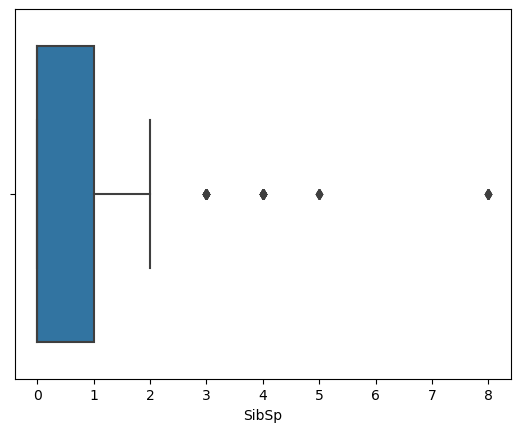

In [18]:
# Check outliers in 'SibSp' column
sns.boxplot(x=df['SibSp'])
plt.show()

# Handle outliers in 'SibSp' column by clipping values
df['SibSp'] = df['SibSp'].clip(0, df['SibSp'].quantile(0.99))


### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Select the feature set and target variable, excluding non-numeric and 'HasCabin' columns
numeric_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
X = df[numeric_columns]
y = df['Survived']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply min-max scaling only to the selected numeric columns
X_scaled = scaler.fit_transform(X)

# Assign the scaled values back to the DataFrame
df[numeric_columns] = X_scaled


In [22]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
PassengerId,,,,,,,,,,,
1,0,1.0,"Braund, Mr. Owen Harris",male,0.334159,0.2,0.000000,A/5 21171,0.029116,S,0
2,1,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.581914,0.2,0.000000,PC 17599,0.286271,C,1
3,1,1.0,"Heikkinen, Miss. Laina",female,0.396098,0.0,0.000000,STON/O2. 3101282,0.031827,S,0
4,1,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.535460,0.2,0.000000,113803,0.213248,S,1
5,0,1.0,"Allen, Mr. William Henry",male,0.535460,0.0,0.000000,373450,0.032329,S,0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,0.5,"Montvila, Rev. Juozas",male,0.411583,0.0,0.000000,211536,0.052208,S,0
888,1,0.0,"Graham, Miss. Margaret Edith",female,0.287705,0.0,0.000000,112053,0.120479,S,1
889,0,1.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.453377,0.2,0.333333,W./C. 6607,0.094174,S,0
